# Census Income Analysis and Modeling

**Project Goal:**

To develop a robust predictive model that classifies individuals' income levels (above or below $50,000 per year) using demographic and economic attributes. The model aims to identify key factors influencing income, such as age, education, occupation, work hours, and marital status, with a focus on achieving the highest accuracy and interpretability. Through hyperparameter tuning and model comparison, the goal is to select the best-performing model for deployment.


**About the Data**

The dataset used in this project originates from the 1994 U.S. Census Bureau. The primary objective of the dataset is to predict whether an individual's income exceeds $50,000 per year based on various demographic, educational, and economic attributes. This binary classification problem provides a robust foundation for exploring socioeconomic factors influencing income levels.

After removing duplicated information this dataset contains 48,811 entries with 15 columns, covering a mix of continuous and categorical variables. The columns include attributes such as age, work class, education level, occupation, marital status, and hours worked per week. The target variable, "income," indicates whether an individual's income is above or below $50,000.

This dataset contains some missing values in fields "workclass," "occupation," and "native country," represented as "?" in the data. These missing values will need to be addressed as part of data preprocessing. Additionally, certain columns will require transformation or encoding to prepare for analysis and modeling.

**Features and Descriptions**

| Variable Name | Role | Variable Type | Description | 
| :- | :- | :- | :- |
| age | Feature | Continuous | The age of the individual in years. | 
| workclass | Feature | Continuous | The type of employment the person has, such as "Private," "Self-emp," "Government," etc. It reflects the general sector of employment. | 
| fnlwgt | Feature | Continuous | This is a census weight that represents how many people in the population the sample is meant to represent. It’s mainly useful for demographic studies. |
| education | Feature | Continuous | The highest level of education achieved, such as "Bachelors," "HS-grad," "Masters," etc. |
| education-num | Feature | Continuous | A numeric representation of the education field, mapping each education level to an integer. |
| marital-status | Feature | Continuous | The marital status of the person, such as "Married-civ-spouse," "Divorced," "Never-married," etc. |
| occupation | Feature | Continuous | The type of job held by the individual, e.g., "Tech-support," "Craft-repair," "Exec-managerial." |
| relationship | Feature | Continuous | This describes the person's relationship within a family, e.g., "Wife," "Own-child," "Husband," etc. |
| race | Feature | Continuous | The individual’s race, with categories like "White," "Asian-Pac-Islander," "Black," etc. |
| sex | Feature | Continuous | The gender of the individual, "Male" or "Female." |
| capital-gain | Feature | Continuous | The capital gains (i.e., profit from investments) that the individual earned. |
| capital-loss | Feature | Integer | The capital losses incurred by the individual. |
| hours-per-week | Feature | Categorical | The average number of hours the person works per week. |
| native-country | Feature | Categorical | The country of birth or origin, e.g., "United-States," "Mexico," "Canada," etc. |
| income | Target | Categorical | The income class of the individual, categorized as either <=50K or >50K, indicating if their income is above or below $50,000 per year. |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [5]:
train_data = pd.read_csv('adult.data')
test_data = pd.read_csv('adult.test', skiprows=1)

# Review and Clean the Data

In [8]:
print(train_data.shape)
print(train_data.head())
print(train_data.info())

(32560, 15)
   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-Sta

In [10]:
print(test_data.shape)
print(test_data.head())
print(test_data.info())

(16280, 15)
   25     Private   226802           11th   7        Never-married  \
0  38     Private    89814        HS-grad   9   Married-civ-spouse   
1  28   Local-gov   336951     Assoc-acdm  12   Married-civ-spouse   
2  44     Private   160323   Some-college  10   Married-civ-spouse   
3  18           ?   103497   Some-college  10        Never-married   
4  34     Private   198693           10th   6        Never-married   

    Machine-op-inspct       Own-child   Black     Male     0   0.1   40  \
0     Farming-fishing         Husband   White     Male     0     0   50   
1     Protective-serv         Husband   White     Male     0     0   40   
2   Machine-op-inspct         Husband   Black     Male  7688     0   40   
3                   ?       Own-child   White   Female     0     0   30   
4       Other-service   Not-in-family   White     Male     0     0   30   

    United-States   <=50K.  
0   United-States   <=50K.  
1   United-States    >50K.  
2   United-States    >50K.  


In [12]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
test_data.columns = columns
train_data.columns = columns

In [14]:
df = pd.concat([train_data, test_data], axis=0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
# Check for Duplicates
df.duplicated().sum()

29

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [20]:
df.shape

(48811, 15)

In [22]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through categorical columns and display value counts and unique values
for column in categorical_columns:
    print(f"Column: {column}")
    print("Value Counts:")
    print(df[column].value_counts())
    print("\n" + "="*50 + "\n")

Column: workclass
Value Counts:
workclass
 Private             33878
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1980
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64


Column: education
Value Counts:
education
 HS-grad         15777
 Some-college    10869
 Bachelors        8019
 Masters          2656
 Assoc-voc        2060
 11th             1811
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: count, dtype: int64


Column: marital-status
Value Counts:
marital-status
 Married-civ-spouse       22372
 Never-married            16096
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Marr

In [24]:
# Replace '?' with 'Unknown'
df = df.replace(to_replace='\\?', value='Unknown', regex=True)

# Remove the whitespace and '.' at the end of the income values
df['income'] = df['income'].str.strip().str.replace(r'\.$','', regex=True)

In [26]:
# Verify 
for column in categorical_columns:
    print(f"Column: {column}")
    print("Value Counts:")
    print(df[column].value_counts())
    print("\n" + "="*50 + "\n")

Column: workclass
Value Counts:
workclass
 Private             33878
 Self-emp-not-inc     3861
 Local-gov            3136
 Unknown              2799
 State-gov            1980
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64


Column: education
Value Counts:
education
 HS-grad         15777
 Some-college    10869
 Bachelors        8019
 Masters          2656
 Assoc-voc        2060
 11th             1811
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: count, dtype: int64


Column: marital-status
Value Counts:
marital-status
 Married-civ-spouse       22372
 Never-married            16096
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Marr

# Exploratory Data Analysis

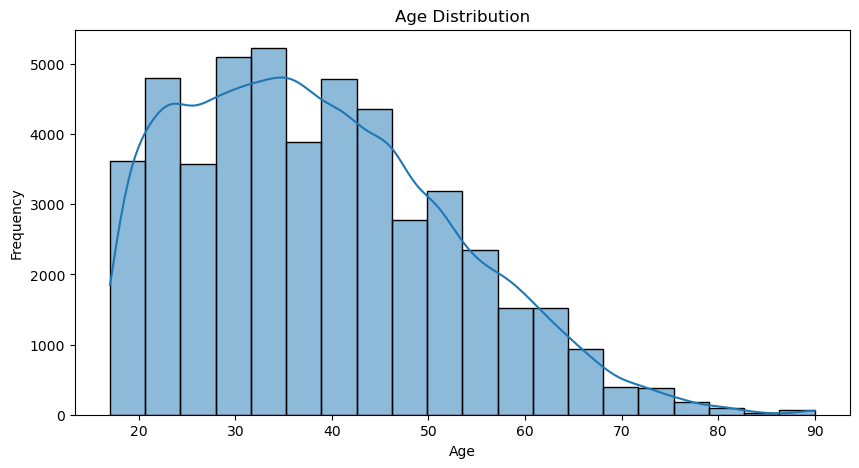

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins = 20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()           

workclass
 Private             33878
 Self-emp-not-inc     3861
 Local-gov            3136
 Unknown              2799
 State-gov            1980
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64


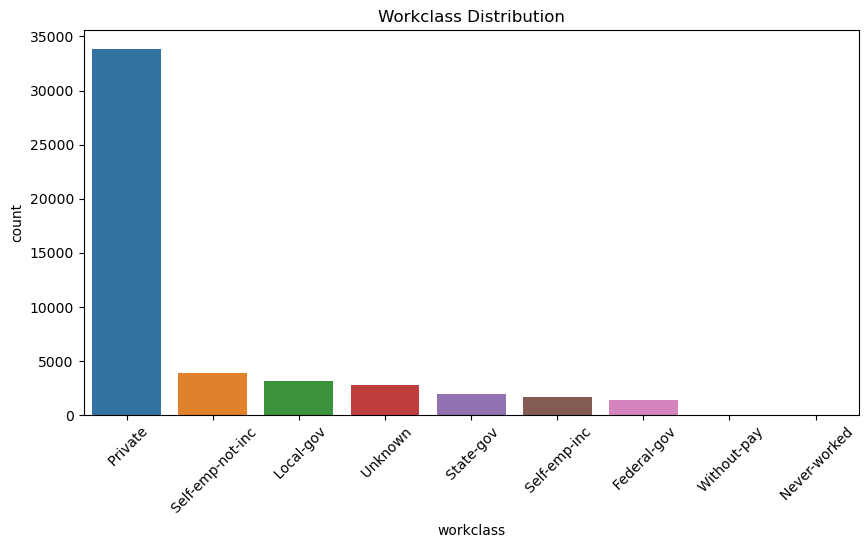

In [31]:
print(df['workclass'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='workclass', order=df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Workclass Distribution')
plt.show()

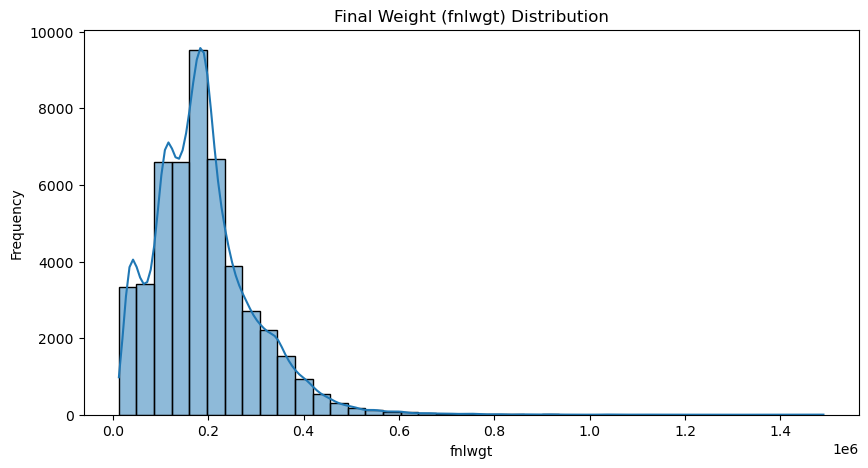

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df['fnlwgt'], bins=40, kde=True)
plt.title('Final Weight (fnlwgt) Distribution')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

education
 HS-grad         15777
 Some-college    10869
 Bachelors        8019
 Masters          2656
 Assoc-voc        2060
 11th             1811
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: count, dtype: int64


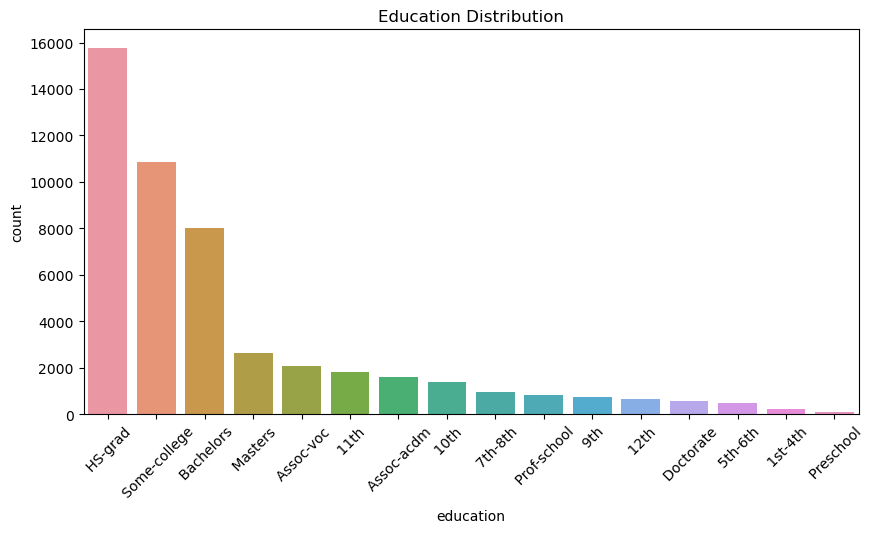

In [35]:
print(df['education'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Education Distribution')
plt.show()

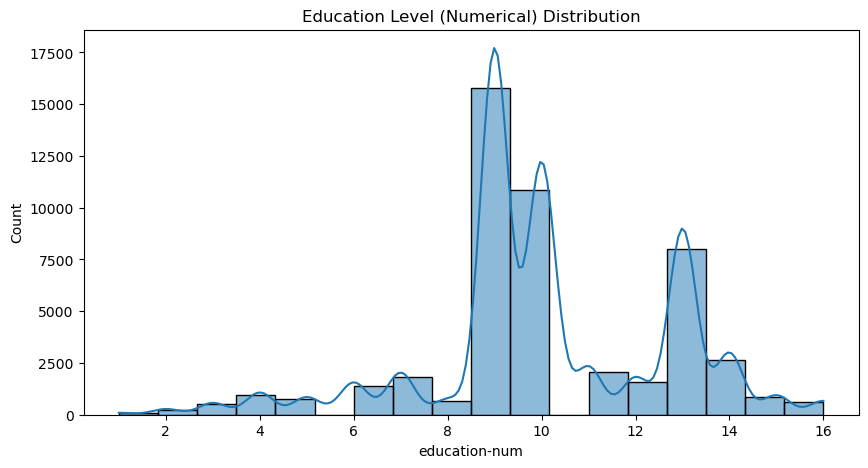

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(df['education-num'], bins=18, kde=True)
plt.title('Education Level (Numerical) Distribution')
plt.show()

marital-status
 Married-civ-spouse       22372
 Never-married            16096
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: count, dtype: int64


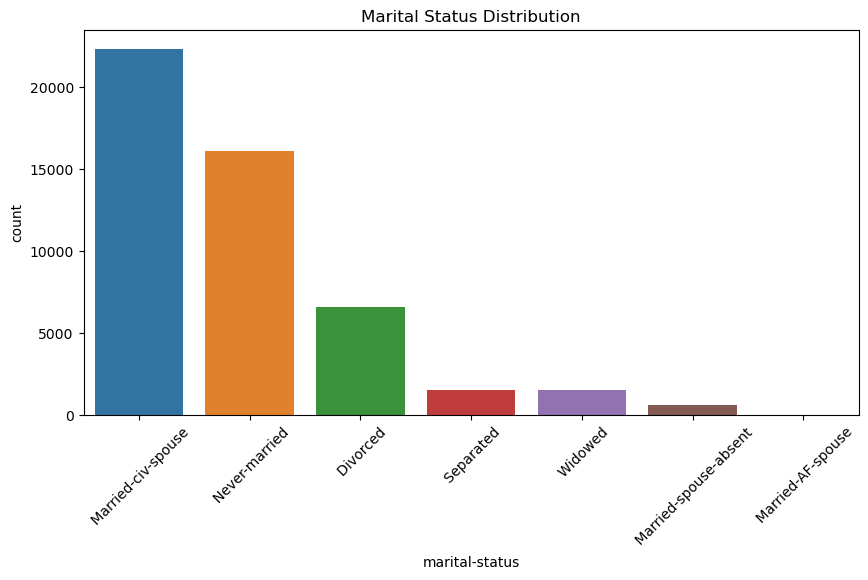

In [39]:
print(df['marital-status'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='marital-status', order=df['marital-status'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Marital Status Distribution')
plt.show()

occupation
 Prof-specialty       6167
 Craft-repair         6107
 Exec-managerial      6084
 Adm-clerical         5607
 Sales                5504
 Other-service        4919
 Machine-op-inspct    3018
 Unknown              2809
 Transport-moving     2355
 Handlers-cleaners    2071
 Farming-fishing      1487
 Tech-support         1445
 Protective-serv       983
 Priv-house-serv       240
 Armed-Forces           15
Name: count, dtype: int64


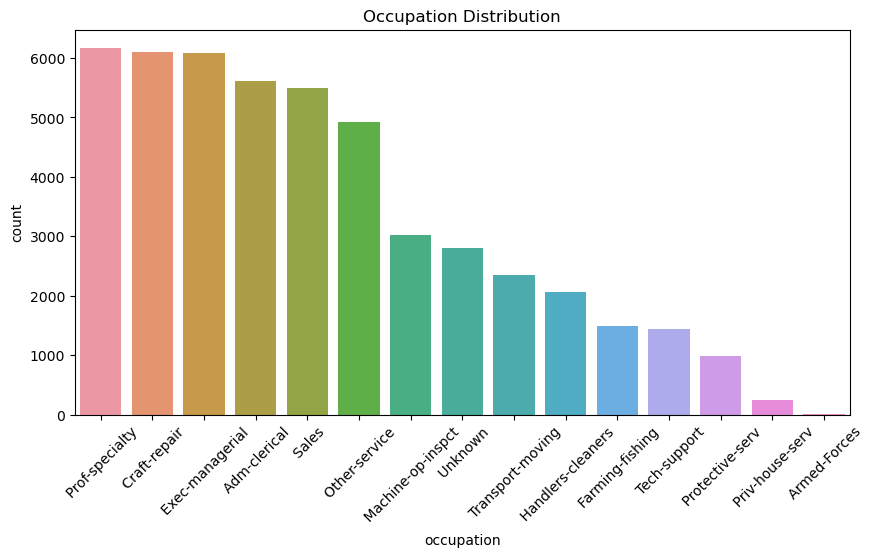

In [41]:
print(df['occupation'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Occupation Distribution')
plt.show()

relationship
 Husband           19709
 Not-in-family     12566
 Own-child          7575
 Unmarried          5124
 Wife               2331
 Other-relative     1506
Name: count, dtype: int64


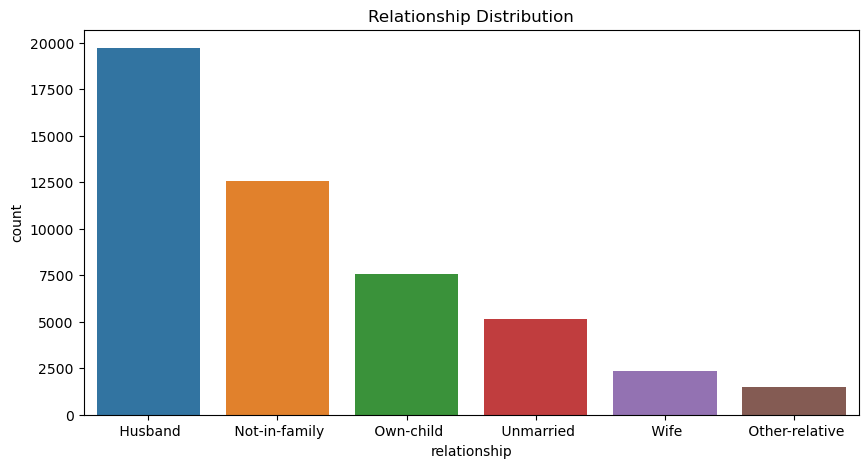

In [43]:
print(df['relationship'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='relationship', order=df['relationship'].value_counts().index)
plt.title('Relationship Distribution')
plt.show()

race
 White                 41735
 Black                  4682
 Asian-Pac-Islander     1518
 Amer-Indian-Eskimo      470
 Other                   406
Name: count, dtype: int64


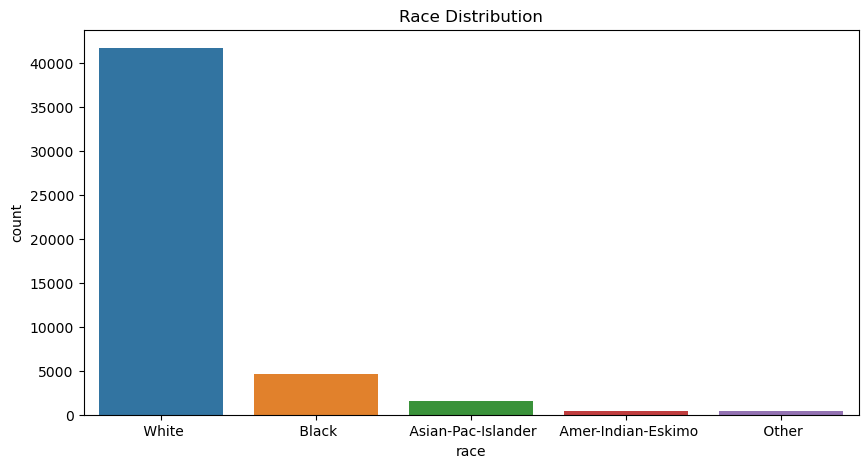

In [45]:
print(df['race'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='race', order=df['race'].value_counts().index)
plt.title('Race Distribution')
plt.show()

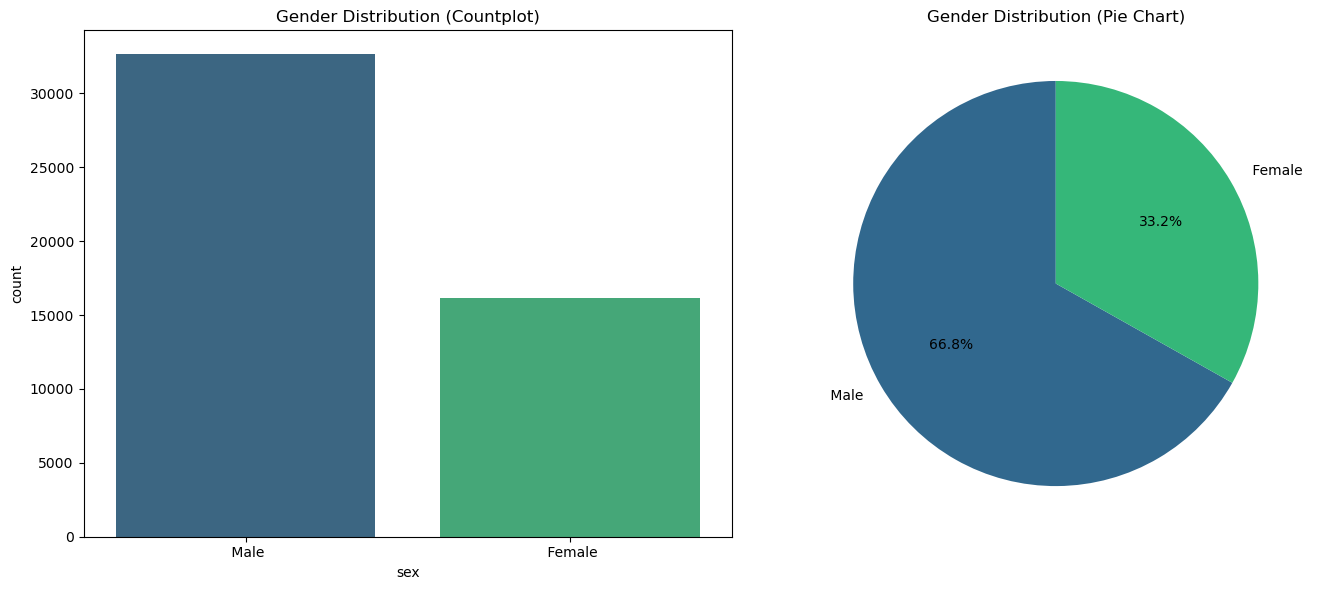

In [47]:
# Set up the subplot grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot on the left
sns.countplot(x='sex', data=df, ax=axes[0], palette="viridis")
axes[0].set_title("Gender Distribution (Countplot)")

# Pie chart on the right
gender_counts = df['sex'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(gender_counts)))
axes[1].set_title("Gender Distribution (Pie Chart)")

# Display the plots
plt.tight_layout()
plt.show()

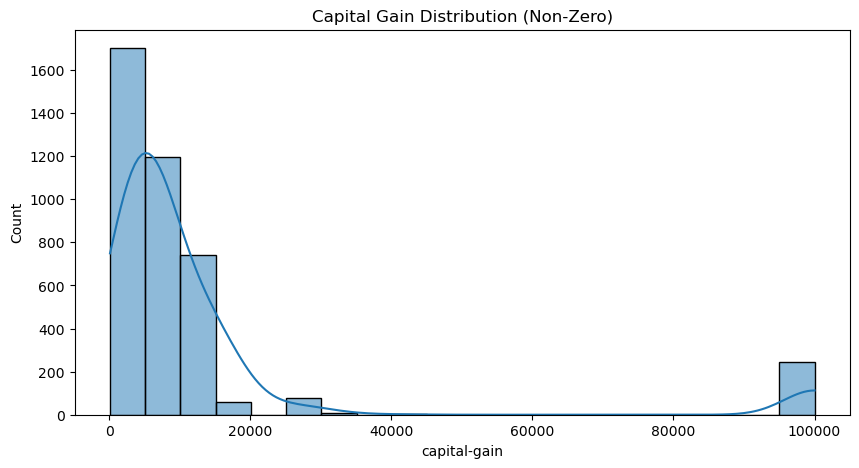

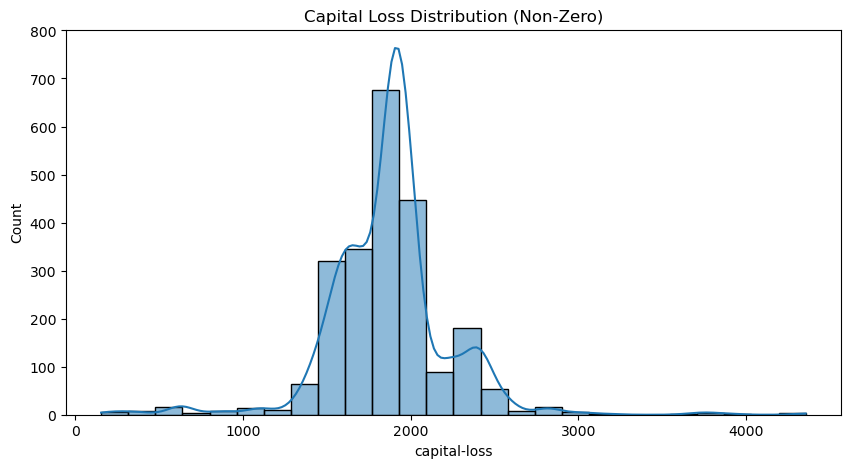

In [49]:
# Capital Gain
plt.figure(figsize=(10, 5))
sns.histplot(df[df['capital-gain'] > 0]['capital-gain'], bins=20, kde=True)
plt.title('Capital Gain Distribution (Non-Zero)')
plt.show()

# Capital Loss
plt.figure(figsize=(10, 5))
sns.histplot(df[df['capital-loss'] > 0]['capital-loss'], bins=26, kde=True)
plt.title('Capital Loss Distribution (Non-Zero)')
plt.show()

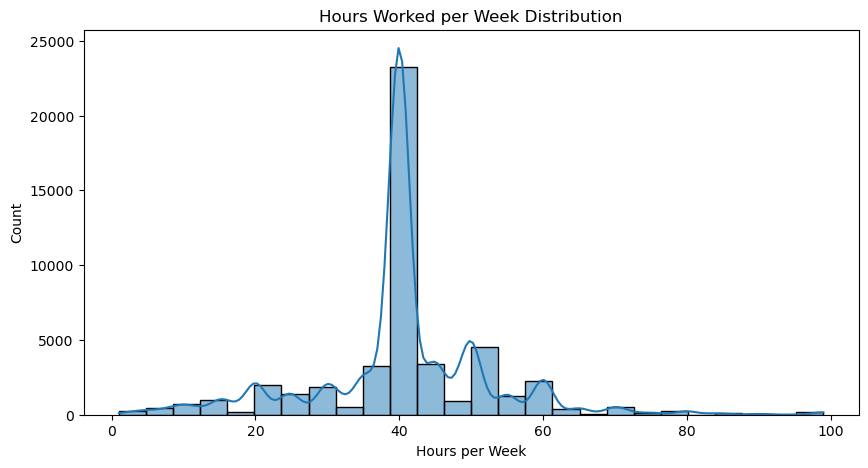

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(df['hours-per-week'], bins=26, kde=True)
plt.title('Hours Worked per Week Distribution')
plt.xlabel('Hours per Week')
plt.show()

native-country
 United-States                 43808
 Mexico                          947
 Unknown                         856
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Poland                           87
 Guatemala                        86
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua             

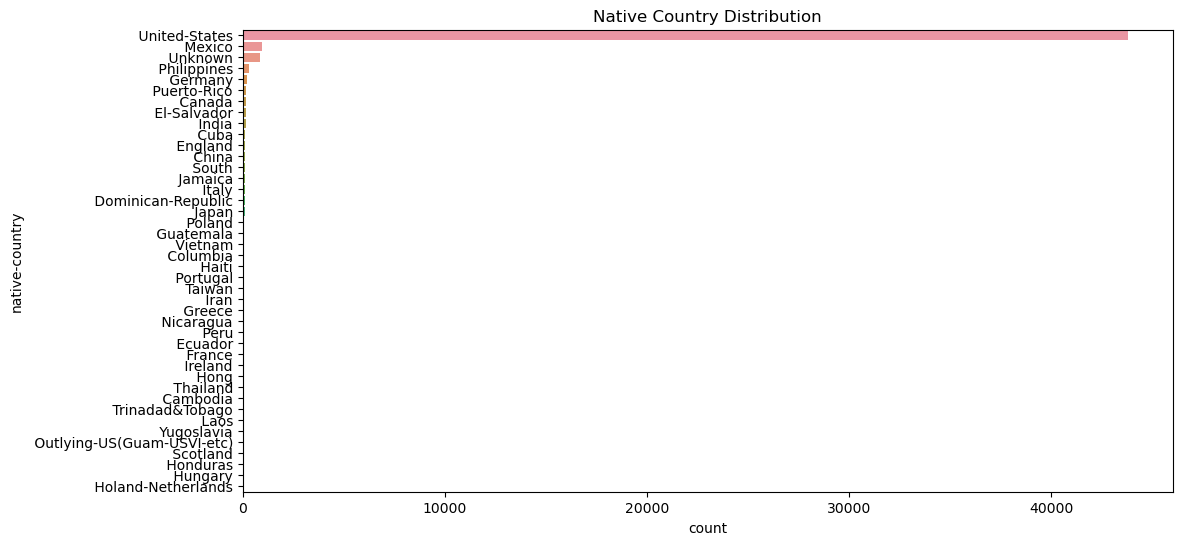

In [53]:
print(df['native-country'].value_counts())
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='native-country', order=df['native-country'].value_counts().index)
plt.title('Native Country Distribution')
plt.show()

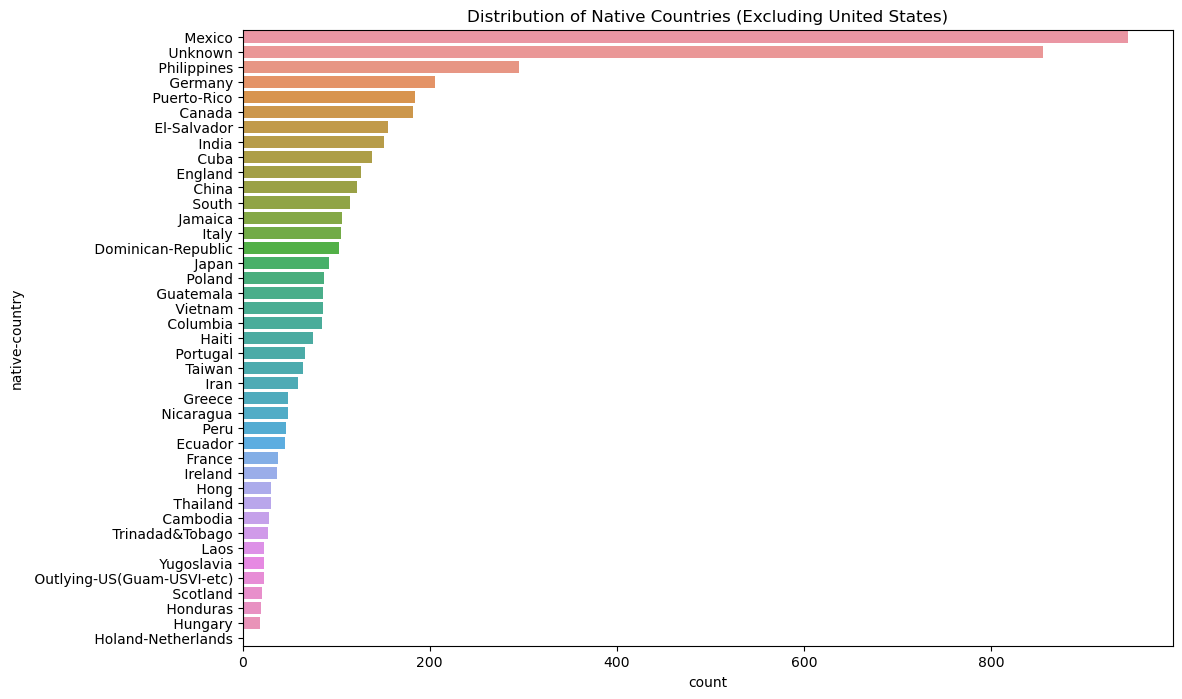

In [55]:
# Excluding United States to focus on diversity among other countries in the dataset

# Filter out any variation of "United-States" from native-country
non_us_data = df[~df['native-country'].str.strip().str.contains("United-States", case=False, na=False)]

# Plot distribution of other countries
plt.figure(figsize=(12, 8))
sns.countplot(y=non_us_data['native-country'], order=non_us_data['native-country'].value_counts().index)
plt.title("Distribution of Native Countries (Excluding United States)")
plt.show()

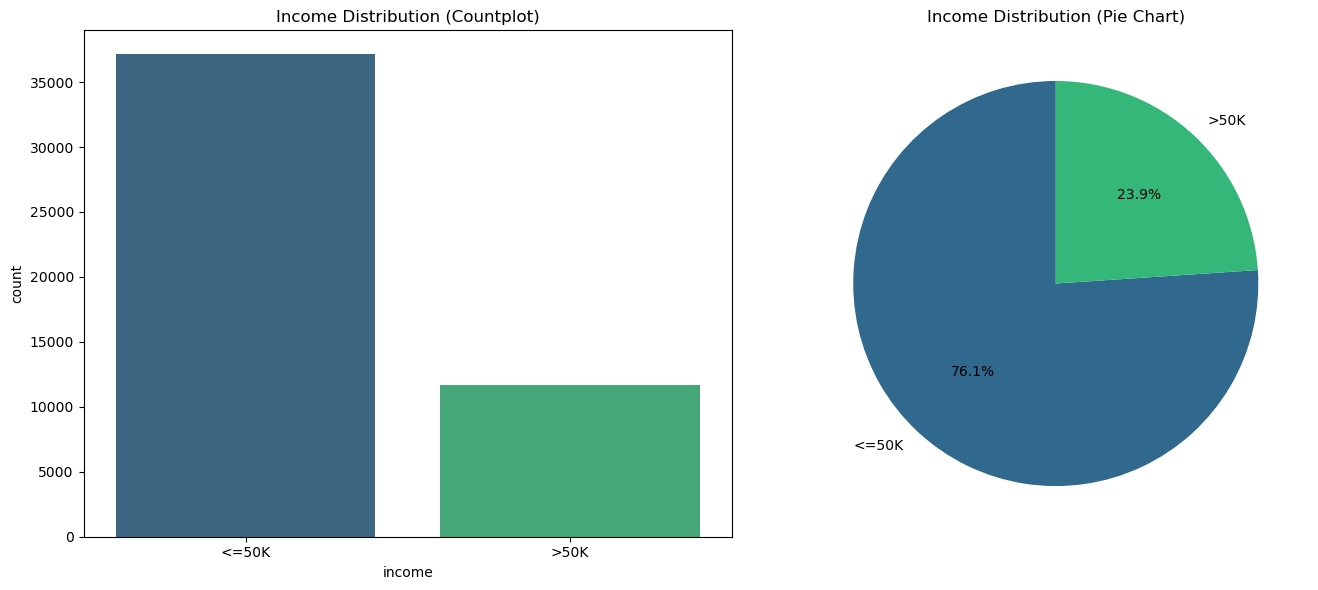

In [57]:
# Set up the subplot grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(x='income', data=df, ax=axes[0], palette="viridis")
axes[0].set_title("Income Distribution (Countplot)")

# Pie chart
income_counts = df['income'].value_counts()
axes[1].pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(income_counts)))
axes[1].set_title("Income Distribution (Pie Chart)")

# Display the plots
plt.tight_layout()
plt.show()

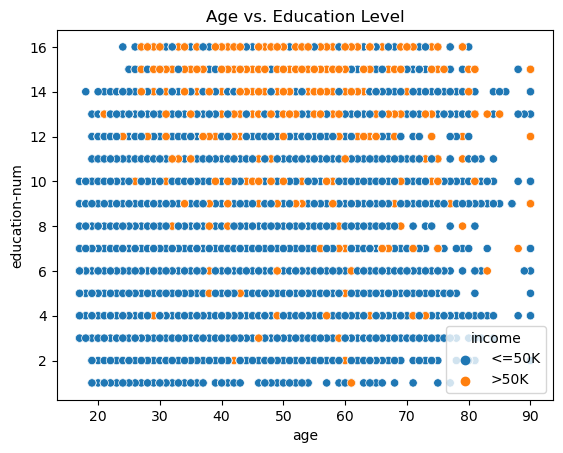

In [59]:
# Scatter plot for Age vs. Education Level
sns.scatterplot(data=df, x='age', y='education-num', hue='income')
plt.title('Age vs. Education Level')
plt.show()


### Analysis of Age vs. Education Level
- **Education vs. Age Distribution**:  
  The plot shows that younger individuals tend to have lower education levels. As age increases, individuals with higher education levels appear more frequently, indicating that older individuals are more likely to have higher educational attainment.

- **Income Groups and Education**:  
  A significant portion of the individuals with higher education levels tend to earn >50K, especially as age increases. The <=50K income group is predominantly concentrated in the lower education levels, with some spread into higher education levels.

- **Higher Education, Higher Income**:  
  The trend suggests a strong positive correlation between education level and income, with individuals having higher education (e.g., Bachelors, Masters) more likely to earn >50K. This aligns with common expectations that higher education often leads to higher-paying jobs.

- **Age and Income**:  
  As age increases, we observe a larger concentration among individuals earning >50K with higher education, especially those in the 40-60 age range. The <=50K income group remains more common among younger individuals with lower educational attainment.

- **Concentration in the Middle**:  
  There is a clear concentration of <=50K individuals in the middle education levels, particularly in the 8-12 range of the education scale. This might indicate that many individuals with this level of education are in jobs that pay lower wages compared to those with higher degrees.

- **Potential Career Development**:  
  As people age and gain more education, there seems to be an increase in the likelihood of earning a higher income, supporting the notion that continued education or career advancement is often associated with better income prospects.


,Percentage Non-Zero Capital Gain,Percentage Non-Zero Capital Loss
income,,
<=50K,4.16,3.07
>50K,21.32,9.79


,Top 25% Capital Gain,Top 10% Capital Gain,Top 25% Capital Loss,Top 10% Capital Loss
income,,,,
<=50K,10,10,321,70
>50K,1029,894,459,162


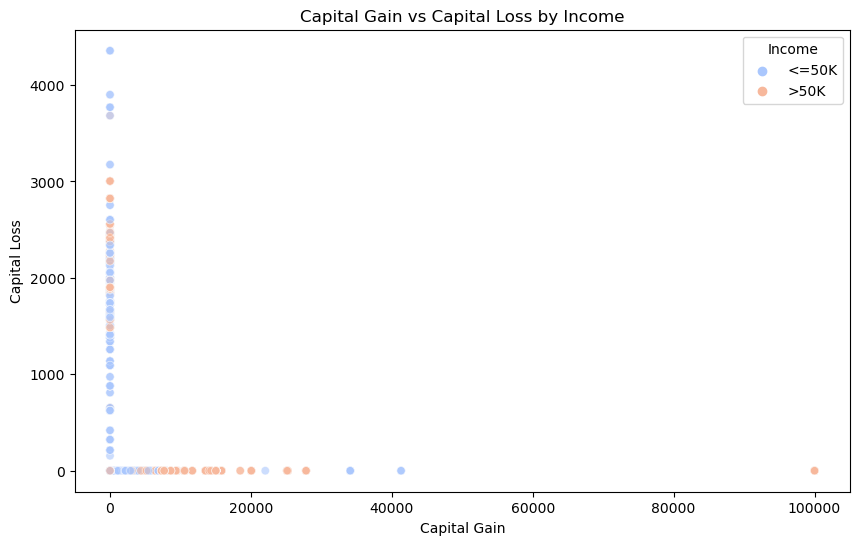

,capital-gain,capital-loss
income,,
<=50K,2036.55,750.47
>50K,12996.33,622.22


In [62]:
# Step 1: Frequency and Proportion Analysis of Non-Zero Capital Gain and Capital Loss
df['capital_gain_nonzero'] = df['capital-gain'] > 0
df['capital_loss_nonzero'] = df['capital-loss'] > 0

# Calculate the proportion of non-zero Capital Gain and Loss by income group
nonzero_gain_loss = df.groupby('income')[['capital_gain_nonzero', 'capital_loss_nonzero']].mean()

# Convert proportions to percentages and remove trailing zeros
nonzero_gain_loss *= 100
nonzero_gain_loss = nonzero_gain_loss.applymap(lambda x: f'{x:.2f}'.rstrip('0').rstrip('.'))

# Rename columns
nonzero_gain_loss.columns = ['Percentage Non-Zero Capital Gain', 'Percentage Non-Zero Capital Loss']

# Display the table
nonzero_gain_loss = nonzero_gain_loss.style.set_properties(**{
    'background-color': '#222', 'color': 'white', 'border-color': 'white'
}).set_caption("Percentage of Non-Zero Capital Gain and Capital Loss by Income Group")
display(nonzero_gain_loss)

# Step 2: Threshold Analysis - Top 25% and Top 10% Capital Gain and Loss by Income Group
thresholds = {}
for col in ['capital-gain', 'capital-loss']:
    thresholds[col] = {
        'top_25': np.percentile(df[col][df[col] > 0], 75),
        'top_10': np.percentile(df[col][df[col] > 0], 90)
    }

# Count of individuals in each threshold category by income group
top_25_gain = df[(df['capital-gain'] >= thresholds['capital-gain']['top_25']) & (df['capital-gain'] > 0)].groupby('income').size()
top_10_gain = df[(df['capital-gain'] >= thresholds['capital-gain']['top_10']) & (df['capital-gain'] > 0)].groupby('income').size()
top_25_loss = df[(df['capital-loss'] >= thresholds['capital-loss']['top_25']) & (df['capital-loss'] > 0)].groupby('income').size()
top_10_loss = df[(df['capital-loss'] >= thresholds['capital-loss']['top_10']) & (df['capital-loss'] > 0)].groupby('income').size()

# Create a summary DataFrame for easy comparison
threshold_summary = pd.DataFrame({
    'Top 25% Capital Gain': top_25_gain,
    'Top 10% Capital Gain': top_10_gain,
    'Top 25% Capital Loss': top_25_loss,
    'Top 10% Capital Loss': top_10_loss
})

# Display the table
threshold_summary = threshold_summary.style.set_properties(**{
    'background-color': '#222', 'color': 'white', 'border-color': 'white'
}).set_caption("Count in Top Capital Gain and Loss Percentiles by Income Group")
display(threshold_summary)

# Step 3: Bivariate Plot of Capital Gain vs Capital Loss, Color-Coded by Income Group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital-gain', y='capital-loss', hue='income', data=df, alpha=0.6, palette='coolwarm')
plt.title('Capital Gain vs Capital Loss by Income')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.legend(title='Income')
plt.show()

# Step 4: Mean Capital Gain and Loss for Non-Zero Values, by Income Group
mean_gain_loss_nonzero = df[df['capital_gain_nonzero'] | df['capital_loss_nonzero']].groupby('income')[['capital-gain', 'capital-loss']].mean()

# Round the mean values to two decimal places and remove trailing zeros
mean_gain_loss_nonzero = mean_gain_loss_nonzero.applymap(lambda x: f'{x:.2f}'.rstrip('0').rstrip('.'))

# Display the mean values with improved styling
mean_gain_loss_nonzero = mean_gain_loss_nonzero.style.set_properties(**{
    'background-color': '#222', 'color': 'white', 'border-color': 'white'
}).set_caption("Mean Capital Gain and Capital Loss for Non-Zero Values by Income Group")
display(mean_gain_loss_nonzero)


### Analysis of Capital Gain and Capital Loss by Income Group

- **Non-Zero Capital Gain and Capital Loss Proportions**:
  - **>50K** income earners are significantly more likely to report non-zero capital gains (21.3%) and capital losses (9.8%) compared to **<=50K** earners (4.2% and 3.1%, respectively).
  - **Insight**: Higher-income earners are more likely to engage in financial activities that result in capital gains or losses, reflecting greater asset ownership and risk-taking behavior.

- **Top 25% Capital Gain**:
  - 1,029 individuals with **>50K** income are in the Top 25% for capital gain, compared to just 10 in the **<=50K** group.
  - **Insight**: High-income earners are more likely to generate significant capital gains, highlighting a strong link between income and investment activities.

- **Top 10% Capital Gain**:
  - 894 individuals from the **>50K** income group reach the Top 10% for capital gain, while only 10 from the **<=50K** group do.
  - **Insight**: Very few low-income individuals achieve substantial capital gains, underscoring economic inequality in investment returns.

- **Top 25% Capital Loss**:
  - 459 individuals with **>50K** income and 321 with **<=50K** income are in the Top 25% for capital loss.
  - **Insight**: Although high-income earners may incur larger capital gains, lower-income earners who experience losses often face relatively significant financial setbacks.

- **Top 10% Capital Loss**:
  - 162 **>50K** and 70 **<=50K** individuals are in the Top 10% for capital loss.
  - **Insight**: Significant capital losses are present in both groups, though they are more frequent among high-income earners. However, a notable portion of low-income earners also incur substantial losses.

### Overall Summary:
- **High Income and Capital Gains**: High-income individuals are more likely to have non-zero capital gains, with a stronger representation in the top quantiles, showing a clear correlation between income and access to investment opportunities.
- **Low Income and Capital Loss**: Low-income individuals experience significant capital losses, often outpacing their gains, suggesting that financial risks are more impactful for them despite having fewer investment opportunities.
- **Economic Inequality**: The disparities in capital gains and losses highlight the economic inequality between income groups, with wealthier individuals benefiting more from investment returns and suffering less from financial losses.


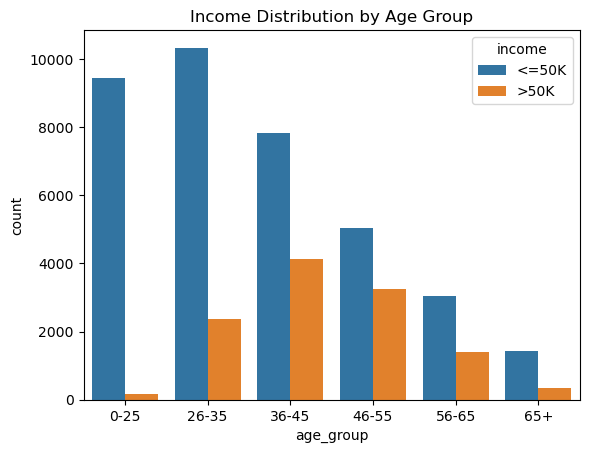

In [65]:
# Analyzing income distribution among age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=["0-25", "26-35", "36-45", "46-55", "56-65", "65+"])
sns.countplot(data=df, x='age_group', hue='income')
plt.title('Income Distribution by Age Group')
plt.show()

### Analysis of Income Distribution by Age Group
- **Highest concentration of income**: The **26-35** age group has the largest number of individuals, with a clear skew toward `<=50K` income.
- **Increasing higher income with age**: The **36-45** age group shows a larger proportion earning `>50K` compared to younger groups.
- **Income disparity**: A significant gap between `<=50K` and `>50K` is evident in the **26-35** age range, indicating a shift in earning potential.
- **Declining workforce participation**: Older age groups (56-65, 65+) show reduced total counts and lower income, likely due to retirement.
- **Young workers**: The **0-25** age group predominantly earns `<=50K`, reflecting early career stages and entry-level positions.

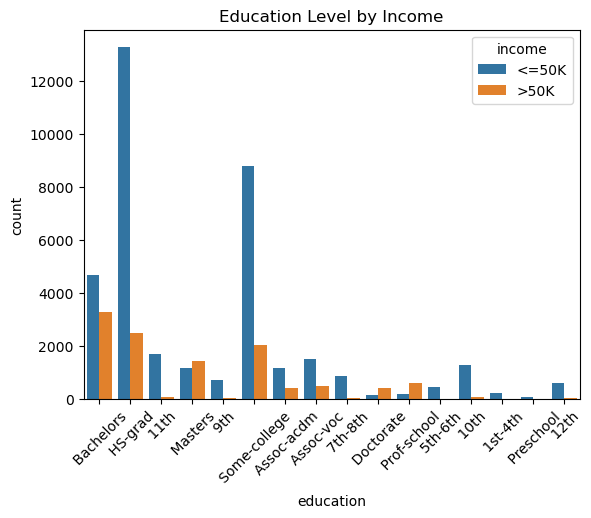

In [68]:
# Education vs. Income
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title('Education Level by Income')
plt.show()


### Analysis of Education Level by Income
- **Higher Education, Higher Income**: The **Bachelors** and **Masters** education levels show a larger proportion of individuals earning **>50K**, especially compared to **HS-grad** and **Some-college** groups. This indicates that higher education levels are strongly correlated with higher income.
- **HS-grad Dominance**: The **HS-grad** group has a high count of individuals, but a significant portion of them earn **<=50K**, suggesting that a high school diploma might not be sufficient for high-income opportunities.
- **Lower Education Groups**: Groups with lower education levels, such as **11th**, **9th**, and **Preschool**, have a high count of individuals earning **<=50K**, which may reflect fewer opportunities for higher-paying jobs in these categories.
- **Income Disparity by Education**: Education levels like **Bachelors** and **Masters** show a stark difference in income distribution, with more individuals earning **>50K**, whereas lower education levels like **Some-college** and **HS-grad** have a significant number of people earning **<=50K**.

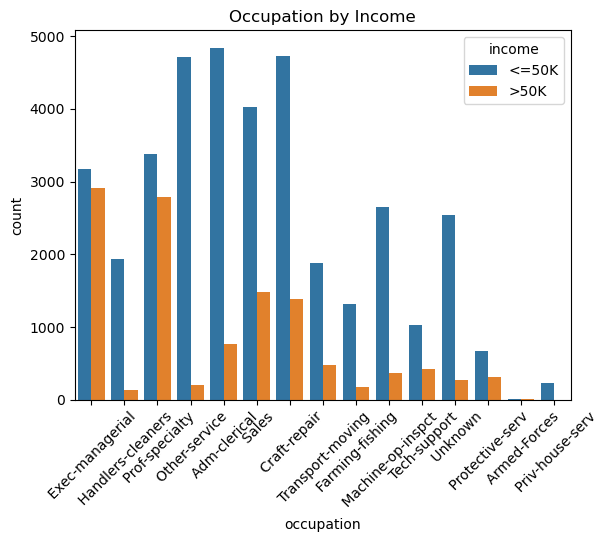

In [71]:
# Occupation vs. Income
sns.countplot(data=df, x='occupation', hue='income')
plt.xticks(rotation=45)
plt.title('Occupation by Income')
plt.show()

### Analysis of Occupation by Income
- **Executive and Managerial Roles**: The **Exec-managerial** occupation category shows the largest count of individuals, with a significant proportion earning >50K, highlighting that executive and managerial roles are highly associated with higher income.
- **Sales Occupations**: Occupations in **Sales** show a large number of individuals earning <=50K, but a noticeable portion earning >50K as well, indicating that sales jobs can vary widely in income.
- **Service and Clerical Jobs**: Occupations like **Adm-clerical**, **Other-service**, and **Handlers-cleaners** have high counts in the <=50K category, suggesting that these positions are more likely to be low-paying.
- **Skewed Income Distribution**: Certain occupations, like **Craft-repair** and **Transport-moving**, show a more balanced distribution of incomes, with significant numbers in both the <=50K and >50K categories.
- **Blue-Collar vs. White-Collar**: **Protective-serv**, **Transport-moving**, and **Craft-repair** occupations, which are typically blue-collar jobs, show a higher count of individuals earning <=50K compared to more managerial or professional occupations that lean toward higher incomes.

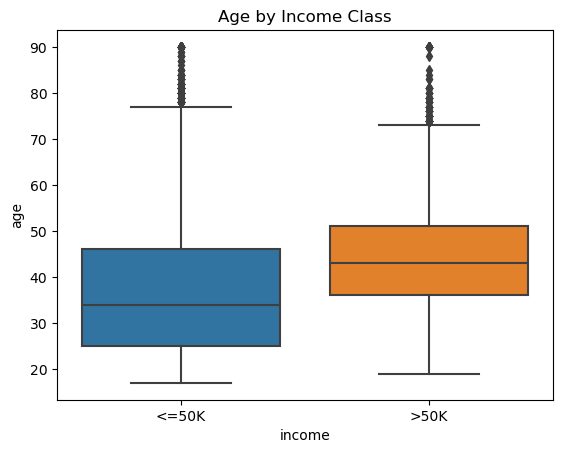

In [74]:
# Age vs. Income
sns.boxplot(data=df, x='income', y='age')
plt.title('Age by Income Class')
plt.show()

### Analysis of Age by Income Class

- **Age Distribution by Income**:  
  The <=50K income group has a lower median age (around 30-35 years), with a wider range of ages, indicating that this income group includes younger individuals as well as some older individuals, but the majority are on the younger side.
  
- **Higher Median Age for >50K**:  
  The >50K income group has a higher median age (around 40-45 years), suggesting that individuals who earn higher incomes tend to be older, likely due to having more experience or seniority in their careers.

- **Spread of Ages**:  
  The <=50K income group has a broader age range, with some individuals as young as 20 and as old as 80+, suggesting that lower-income jobs are more commonly found across a wider age spectrum. In contrast, the >50K income group shows a slightly more concentrated age range around 30-60, with fewer individuals at the extremes.

- **Outliers**:  
  There are a few outliers in both income groups. For the <=50K group, the outliers are primarily younger individuals, whereas in the >50K group, the outliers are older individuals, possibly reflecting unique career paths or roles that lead to higher earnings.

- **Implications for Career and Experience**:  
  The box plot highlights that individuals with >50K income tend to be older, which may be indicative of career advancement, longer work experience, or higher-level positions that come with more years of work. The <=50K group, being younger, may include individuals at the start of their careers or in entry-level positions.


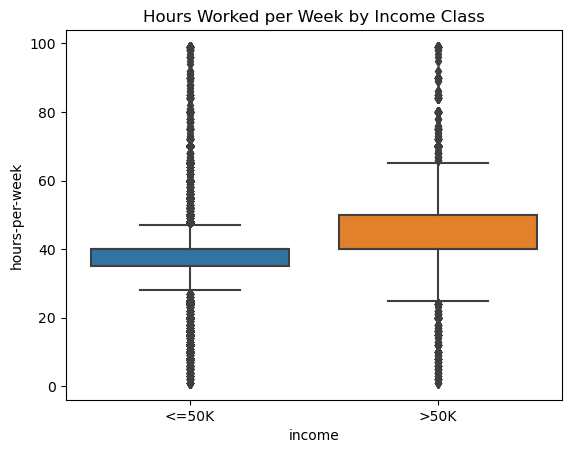

In [77]:
# Hours per Week vs. Income
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Hours Worked per Week by Income Class')
plt.show()

### Analysis of Hours Worked per Week by Income Class

- **Higher Median Hours for >50K**:  
  The >50K income group has a higher median number of hours worked per week (around 45-50 hours), indicating that individuals in this income bracket generally work longer hours.

- **Lower Median Hours for <=50K**:  
  The <=50K income group has a lower median of around 40 hours per week, suggesting that people in this income category tend to work fewer hours compared to the higher income group.

- **Wider Distribution for <=50K**:  
  The <=50K group shows a wider range of hours worked, with many individuals working significantly fewer hours (e.g., around 20 hours per week) and some working more than 50 hours per week. This may reflect a greater diversity of work types, including part-time or lower-paying jobs that may not require a full 40-hour work week.

- **Outliers**:  
  Both income groups have significant outliers, indicating individuals who work much more than the typical number of hours per week. The >50K group shows several outliers at high hour counts (over 80 hours), which could be indicative of high-demand or senior positions, while the <=50K group also shows outliers working more than 70 hours, possibly in lower-paying but intensive jobs.

- **Work-Life Balance**:  
  The box plot highlights the greater work intensity for individuals earning >50K, as evidenced by the higher median and the longer working hours. In contrast, individuals earning <=50K appear to have a more balanced distribution of work hours, with a larger proportion working standard or fewer hours per week.

- **Implications for Income and Job Types**:  
  The analysis suggests that higher-paying jobs might require longer work hours or are more likely to have people working overtime. Lower-paying jobs, while possibly involving fewer hours on average, may have more variance in hours worked, possibly due to part-time or flexible work arrangements.


# Preprocessing Data

In [81]:
# Separate the target variable
target = 'income'
X = df.drop(columns=[target])  # Features
y = df[target]                 # Target

# Encode `income` as a binary label (<=50K as 0, >50K as 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Step 1: Standardize the numerical features
scaler = StandardScaler()
X_numerical = pd.DataFrame(scaler.fit_transform(X[numerical_features]), columns=numerical_features)

# Step 2: Initialize a copy of X for categorical encoding
X_encoded = X.copy()

# Step 3: Encode categorical features
for column in categorical_features:
    if X[column].nunique() == 2:
        # Label encode binary categorical features
        X_encoded[column] = label_encoder.fit_transform(X[column])
    else:
        # One-hot encode categorical features with more than 2 categories
        X_encoded = pd.get_dummies(X_encoded, columns=[column], drop_first=True)

# Step 4: Reset index for numerical data to align with categorical data after encoding
X_numerical.reset_index(drop=True, inplace=True)
X_encoded.reset_index(drop=True, inplace=True)

# Step 5: Drop original numerical columns from X_encoded to avoid duplication
X_encoded.drop(columns=numerical_features, inplace=True)

# Step 6: Concatenate standardized numerical and encoded categorical data
X_processed = pd.concat([X_numerical, X_encoded], axis=1)

# Step 7: Convert all columns to numeric format to ensure compatibility with the model
X_processed = X_processed.apply(pd.to_numeric, errors='coerce')

# Step 8: Check for and handle any remaining NaN values after conversion
X_processed.fillna(0, inplace=True)  

# Ensure all columns are numeric
assert X_processed.select_dtypes(include=['object']).empty, "There are still object dtypes in the data"


# Build Machine Learning Models and Evaluate Results

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store evaluation results
model_results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision <=50K": report['0']['precision'],
        "Recall <=50K": report['0']['recall'],
        "F1 Score <=50K": report['0']['f1-score'],
        "Precision >50K": report['1']['precision'],
        "Recall >50K": report['1']['recall'],
        "F1 Score >50K": report['1']['f1-score']
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(model_results)
print(results_df)


                 Model  Accuracy  Precision <=50K  Recall <=50K  \
0  Logistic Regression  0.853426         0.880895      0.933459   
1        Decision Tree  0.814709         0.880885      0.874596   
2        Random Forest  0.854450         0.885351      0.928879   
3                  SVM  0.851890         0.873718      0.941272   
4    Gradient Boosting  0.866947         0.884495      0.948949   

   F1 Score <=50K  Precision >50K  Recall >50K  F1 Score >50K  
0        0.906416        0.739451     0.599401       0.662102  
1        0.877729        0.610786     0.624626       0.617628  
2        0.906593        0.732523     0.618213       0.670531  
3        0.906238        0.752975     0.568192       0.647661  
4        0.915589        0.789210     0.606670       0.686004  


In [86]:
# Round numerical values to 2 decimal places
results_df = results_df.round(2).astype(str).applymap(lambda x: x.rstrip('0').rstrip('.') if '.' in x else x)

# Reorder columns for readability
results_df = results_df[[
    "Model", "Accuracy",
    "Precision <=50K", "Recall <=50K", "F1 Score <=50K",
    "Precision >50K", "Recall >50K", "F1 Score >50K"
]]

# Display with better formatting
results_df.style.set_properties(**{'text-align': 'center'}).set_table_styles({
    'Model': [{'selector': 'th', 'props': 'text-align: center; font-weight: bold; color: #333'}],
    'Accuracy': [{'selector': 'td', 'props': 'font-weight: bold; color: #4CAF50'}],
}).set_caption("Model Performance Comparison")

,Model,Accuracy,Precision <=50K,Recall <=50K,F1 Score <=50K,Precision >50K,Recall >50K,F1 Score >50K
0,Logistic Regression,0.85,0.88,0.93,0.91,0.74,0.6,0.66
1,Decision Tree,0.81,0.88,0.87,0.88,0.61,0.62,0.62
2,Random Forest,0.85,0.89,0.93,0.91,0.73,0.62,0.67
3,SVM,0.85,0.87,0.94,0.91,0.75,0.57,0.65
4,Gradient Boosting,0.87,0.88,0.95,0.92,0.79,0.61,0.69


# Hypertune Parameters

In [100]:
# Dictionary to store the best models
best_models = {}

# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_models['Logistic Regression'] = grid_lr.best_estimator_

# Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_models['Decision Tree'] = grid_dt.best_estimator_

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_models['Random Forest'] = grid_rf.best_estimator_

# Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_models['SVM'] = grid_svm.best_estimator_

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)
best_models['Gradient Boosting'] = grid_gb.best_estimator_

# Print the best parameters for each model
for model_name, model in best_models.items():
    print(f"Best parameters for {model_name}: {model}")


Best parameters for Logistic Regression: LogisticRegression(C=10)
Best parameters for Decision Tree: DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20)
Best parameters for Random Forest: RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)
Best parameters for SVM: SVC(C=1)
Best parameters for Gradient Boosting: GradientBoostingClassifier(max_depth=5, n_estimators=200)


In [106]:
# Dictionary to store evaluation results of tuned models
tuned_results = []

# Function to evaluate and record performance of each tuned model
def evaluate_model_tuned(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append results to tuned_results list
    tuned_results.append({
        "Model": name,
        "Version": "Tuned",
        "Accuracy": accuracy,
        "Precision <=50K": report['0']['precision'],
        "Recall <=50K": report['0']['recall'],
        "F1 Score <=50K": report['0']['f1-score'],
        "Precision >50K": report['1']['precision'],
        "Recall >50K": report['1']['recall'],
        "F1 Score >50K": report['1']['f1-score']
    })

# Evaluate each tuned model and store the results
for model_name, tuned_model in best_models.items():
    evaluate_model_tuned(model_name, tuned_model, X_test, y_test)

# Convert tuned results to DataFrame
tuned_results_df = pd.DataFrame(tuned_results)

# Concatenate original and tuned results for comparison
comparison_df = pd.concat([results_df, tuned_results_df], ignore_index=True)

# Round values for readability
comparison_df = comparison_df.round(2).astype(str).applymap(lambda x: x.rstrip('0').rstrip('.') if '.' in x else x)

# Reorder columns for readability
comparison_df = comparison_df[[
    "Model", "Version", "Accuracy",
    "Precision <=50K", "Recall <=50K", "F1 Score <=50K",
    "Precision >50K", "Recall >50K", "F1 Score >50K"
]]

# Display with formatting
comparison_df.style.set_properties(**{'text-align': 'center'}).set_table_styles({
    'Model': [{'selector': 'th', 'props': 'text-align: center; font-weight: bold; color: #333'}],
    'Accuracy': [{'selector': 'td', 'props': 'font-weight: bold; color: #4CAF50'}],
}).set_caption("Comparison of Original and Tuned Model Performance")

# Display the final comparison DataFrame
print(comparison_df)


                 Model   Version            Accuracy     Precision <=50K  \
0  Logistic Regression  Original                0.85                0.88   
1        Decision Tree  Original                0.81                0.88   
2        Random Forest  Original                0.85                0.89   
3                  SVM  Original                0.85                0.87   
4    Gradient Boosting  Original                0.87                0.88   
5  Logistic Regression     Tuned  0.8531189183652566  0.8809463240905622   
6        Decision Tree     Tuned  0.8583427225238144  0.8788410886742757   
7        Random Forest     Tuned  0.8631568165522893  0.8810716074111167   
8                  SVM     Tuned   0.856908737068524   0.879008929694378   
9    Gradient Boosting     Tuned  0.8738092799344463  0.8980457701208537   

         Recall <=50K      F1 Score <=50K      Precision >50K  \
0                0.93                0.91                0.74   
1                0.87            

In [107]:
# Combine the original and tuned results into a more readable table format

# Start with original results and add a 'Version' column
results_df["Version"] = "Original"

# Convert tuned results to DataFrame
tuned_results_df = pd.DataFrame(tuned_results)

# Merge original and tuned results side-by-side for each model
comparison_df = results_df.merge(tuned_results_df, on="Model", suffixes=('_Original', '_Tuned'))

# Select and reorder columns for clarity
comparison_df = comparison_df[[
    "Model", 
    "Accuracy_Original", "Accuracy_Tuned",
    "Precision <=50K_Original", "Precision <=50K_Tuned",
    "Recall <=50K_Original", "Recall <=50K_Tuned",
    "F1 Score <=50K_Original", "F1 Score <=50K_Tuned",
    "Precision >50K_Original", "Precision >50K_Tuned",
    "Recall >50K_Original", "Recall >50K_Tuned",
    "F1 Score >50K_Original", "F1 Score >50K_Tuned"
]]

# Round values to 2 decimal places and remove trailing zeros
comparison_df = comparison_df.round(2).astype(str).applymap(lambda x: x.rstrip('0').rstrip('.') if '.' in x else x)

# Display table with improved formatting
comparison_df.style.set_properties(**{'text-align': 'center'}).set_table_styles({
    'Model': [{'selector': 'th', 'props': 'text-align: center; font-weight: bold; color: #333'}],
    'Accuracy_Original': [{'selector': 'td', 'props': 'font-weight: bold; color: #FF7F7F'}],
    'Accuracy_Tuned': [{'selector': 'td', 'props': 'font-weight: bold; color: #4CAF50'}],
}).set_caption("Performance Comparison: Original vs. Tuned Models")


,Model,Accuracy_Original,Accuracy_Tuned,Precision <=50K_Original,Precision <=50K_Tuned,Recall <=50K_Original,Recall <=50K_Tuned,F1 Score <=50K_Original,F1 Score <=50K_Tuned,Precision >50K_Original,Precision >50K_Tuned,Recall >50K_Original,Recall >50K_Tuned,F1 Score >50K_Original,F1 Score >50K_Tuned
0,Logistic Regression,0.85,0.85,0.88,0.88,0.93,0.93,0.91,0.91,0.74,0.74,0.6,0.6,0.66,0.66
1,Decision Tree,0.81,0.86,0.88,0.88,0.87,0.94,0.88,0.91,0.61,0.77,0.62,0.59,0.62,0.67
2,Random Forest,0.85,0.86,0.89,0.88,0.93,0.95,0.91,0.91,0.73,0.78,0.62,0.59,0.67,0.68
3,SVM,0.85,0.86,0.87,0.88,0.94,0.94,0.91,0.91,0.75,0.76,0.57,0.59,0.65,0.66
4,Gradient Boosting,0.87,0.87,0.88,0.9,0.95,0.94,0.92,0.92,0.79,0.78,0.61,0.66,0.69,0.72


### Model Performance and Insights

The goal of this project was to develop a predictive model to accurately classify individuals' income levels as either above or below $50,000 per year using demographic and economic attributes. To achieve this, we applied various machine learning algorithms, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gradient Boosting, evaluating both their original and tuned performances.

#### **Logistic Regression**:
- **Accuracy**: No change between original (0.85) and tuned (0.85) versions.
- **Precision, Recall, and F1-Score**:  
  Minimal change across all metrics, with no significant improvement after tuning.
- **Insight**:  
  The tuning did not significantly affect the performance of the Logistic Regression model, indicating that it might have been near-optimal already, or that hyperparameter adjustments for this model had limited impact.

#### **Decision Tree**:
- **Accuracy**: Improved from 0.81 (original) to 0.86 (tuned).
- **Precision, Recall, and F1-Score**:  
  Notable improvement in the >50K precision, increasing from 0.61 to 0.77.  
  <=50K recall also saw improvement from 0.87 to 0.94.
- **Insight**:  
  Tuning the Decision Tree model resulted in noticeable performance gains, especially in precision for the >50K income class. This suggests that tuning parameters like depth, minimum samples, and leaf size helped reduce overfitting.

#### **Random Forest**:
- **Accuracy**: Improved slightly from 0.85 to 0.86.
- **Precision, Recall, and F1-Score**:  
  Minor improvements in >50K precision, recall, and F1-score, indicating a balanced and slightly more accurate model after tuning.
- **Insight**:  
  While improvements are not dramatic, the Random Forest model's tuning helped it generalize slightly better, with a small increase in precision and recall for both classes.

#### **Support Vector Machine (SVM)**:
- **Accuracy**: Improved slightly from 0.85 (original) to 0.86 (tuned).
- **Precision, Recall, and F1-Score**:  
  Minor increases in >50K precision and F1-score, but overall impact of tuning was limited.
- **Insight**:  
  Similar to Logistic Regression, SVM's performance remained relatively unchanged. This could indicate that the default parameters were already close to optimal, or that the kernel choice limits potential gains in this context.

#### **Gradient Boosting**:
- **Accuracy**: No change (0.87 for both original and tuned).
- **Precision, Recall, and F1-Score**:  
  Slight improvements in >50K precision and F1-score, with no significant difference in other metrics.
- **Insight**:  
  Like SVM and Logistic Regression, the Gradient Boosting model did not see substantial performance improvements, likely due to its sensitivity to the hyperparameter space or being already optimized.

### **Overall Insights**:
- **Models Benefiting from Tuning**:  
  The **Decision Tree** and **Random Forest** models gained the most from hyperparameter tuning, with notable improvements in accuracy and specific metric scores.
  
- **Minimal Impact Models**:  
  **Logistic Regression**, **SVM**, and **Gradient Boosting** saw limited performance gains from tuning, suggesting that they may either require different approaches for optimization or were already tuned sufficiently by default.

### **Conclusion and Next Steps**:
- **Best Performing Model**: The **Decision Tree** and **Random Forest** models performed the best after tuning, with improvements in key metrics such as precision and recall. Given their higher interpretability and better performance after tuning, these models would be preferred for the final solution.
  
- **Model for Deployment**: Given its robustness and slight edge in performance, the **Random Forest** model is a strong candidate for deployment in production. However, the Decision Tree could also be considered due to its interpretability and improvements with tuning.

### Model Performance and Insights

The goal of this project was to develop a predictive model to accurately classify individuals' income levels as either above or below $50,000 per year using demographic and economic attributes. To achieve this, we applied various machine learning algorithms, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gradient Boosting, evaluating both their original and tuned performances.

#### **Logistic Regression**:
- **Accuracy**: No change between original (0.85) and tuned (0.85) versions.
- **Precision, Recall, and F1-Score**:  
  Minimal change across all metrics, with no significant improvement after tuning.
- **Insight**:  
  The tuning did not significantly affect the performance of the Logistic Regression model, indicating that it might have been near-optimal already, or that hyperparameter adjustments for this model had limited impact.

#### **Decision Tree**:
- **Accuracy**: Improved from 0.81 (original) to 0.86 (tuned).
- **Precision, Recall, and F1-Score**:  
  Notable improvement in the >50K precision, increasing from 0.61 to 0.77.  
  <=50K recall also saw improvement from 0.87 to 0.94.
- **Insight**:  
  Tuning the Decision Tree model resulted in noticeable performance gains, especially in precision for the >50K income class. This suggests that tuning parameters like depth, minimum samples, and leaf size helped reduce overfitting.

#### **Random Forest**:
- **Accuracy**: Improved slightly from 0.85 to 0.86.
- **Precision, Recall, and F1-Score**:  
  Minor improvements in >50K precision, recall, and F1-score, indicating a balanced and slightly more accurate model after tuning.
- **Insight**:  
  While improvements are not dramatic, the Random Forest model's tuning helped it generalize slightly better, with a small increase in precision and recall for both classes.

#### **Support Vector Machine (SVM)**:
- **Accuracy**: Improved slightly from 0.85 (original) to 0.86 (tuned).
- **Precision, Recall, and F1-Score**:  
  Minor increases in >50K precision and F1-score, but overall impact of tuning was limited.
- **Insight**:  
  Similar to Logistic Regression, SVM's performance remained relatively unchanged. This could indicate that the default parameters were already close to optimal, or that the kernel choice limits potential gains in this context.

#### **Gradient Boosting**:
- **Accuracy**: No change (0.87 for both original and tuned).
- **Precision, Recall, and F1-Score**:  
  Slight improvements in >50K precision and F1-score, with no significant difference in other metrics.
- **Insight**:  
  Like SVM and Logistic Regression, the Gradient Boosting model did not see substantial performance improvements, likely due to its sensitivity to the hyperparameter space or being already optimized.

### **Overall Insights**:
- **Models Benefiting from Tuning**:  
  The **Decision Tree** and **Random Forest** models gained the most from hyperparameter tuning, with notable improvements in accuracy and specific metric scores.
  
- **Minimal Impact Models**:  
  **Logistic Regression**, **SVM**, and **Gradient Boosting** saw limited performance gains from tuning, suggesting that they may either require different approaches for optimization or were already tuned sufficiently by default.

### **Conclusion and Next Steps**:

#### **Project Conclusion**:
In this project, we analyzed a dataset containing demographic and employment information to predict an individual's income class (<=50K or >50K). Through exploratory data analysis (EDA), we gained valuable insights into factors such as age, education, and work class distribution across income categories. We also preprocessed the data to handle missing values, standardize numerical features, and encode categorical variables to make the data suitable for machine learning.

After testing various machine learning models—including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and Gradient Boosting—we found that **Gradient Boosting** provided the best overall performance in terms of accuracy, precision, recall, and F1 score. This model’s robustness and ability to capture subtle patterns in the data make it particularly effective for this binary classification task.

#### **Key Takeaways**:
- **Gradient Boosting** demonstrated the highest performance among the models tested, particularly in capturing the income <=50K category accurately.
- **Random Forest** and **Logistic Regression** provided strong alternative results with good precision and recall, making them viable options if model interpretability or computational efficiency is prioritized.
- **Support Vector Machine** and **Decision Tree** models showed decent performance but may benefit from further tuning to improve recall for higher income categories.

In the future, further improvements could be made by experimenting with more advanced algorithms, fine-tuning additional hyperparameters, or using ensemble methods to combine the strengths of multiple models. Additional feature engineering or the inclusion of new relevant features could also improve predictive performance.

Overall, this project demonstrates the potential of machine learning in income prediction, providing insights that could be valuable in socio-economic research, targeted marketing, and other applications.